## Install libraries

In [ ]:
!pip install tensorflow matplotlib

## Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load the IMDb movie reviews dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocess the data

In [ ]:
x_train = pad_sequences(x_train, maxlen=256, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=256, padding='post', truncating='post')

In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]
[1 0 0 ... 0 1 0]
[[   1  591  202 ...    0    0    0]
 [   1   14   22 ...   28    8  818]
 [   1  111  748 ... 5437   26 4434]
 ...
 [   1   13 1408 ...    0    0    0]
 [   1   11  119 ...    0    0    0]
 [   1    6   52 ...    0    0    0]]
[0 1 1 ... 0 0 0]


## Build the model

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),  # Embedding layer
    GlobalAveragePooling1D(),  # Global average pooling layer
    Dense(16, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

## Compile the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5320 - loss: 0.6919 - val_accuracy: 0.5454 - val_loss: 0.6846
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6054 - loss: 0.6804 - val_accuracy: 0.7272 - val_loss: 0.6638
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6988 - loss: 0.6562 - val_accuracy: 0.7450 - val_loss: 0.6295
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7592 - loss: 0.6187 - val_accuracy: 0.7326 - val_loss: 0.5892
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7679 - loss: 0.5725 - val_accuracy: 0.7820 - val_loss: 0.5389
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8199 - loss: 0.5168 - val_accuracy: 0.8308 - val_loss: 0.4905
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8391 - loss: 0.4692 - val_accuracy: 0.8390 - val_loss: 0.4506
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8543 - loss: 0.4239 - val_accuracy: 0.8454 - v

## Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3835
Test accuracy: 0.8494399785995483


## Plot the training history

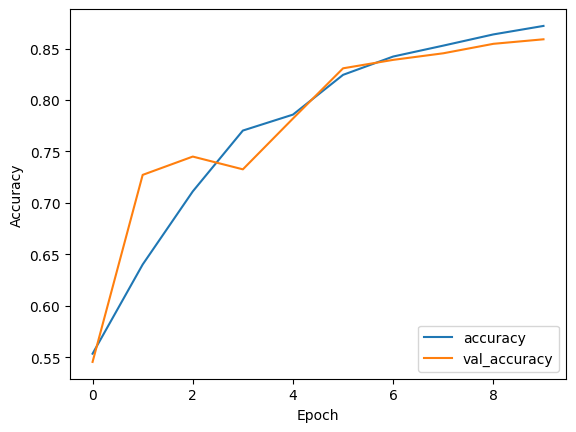

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Make predictions using the trained model

In [ ]:
predictions = model.predict(x_test[:, 20:25])
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
# Add 3 to the indices to account for padding, start of sequence, and unknown tokens
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2

index_word = {v:k for k,v in word_index.items()}

In [ ]:
index_word

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

## Display the reviews and their predicted labels

In [ ]:
for i in range(20,25):
    review = ' '.join([index_word[idx] for idx in x_test[i] if idx > 2])  # Ignore padding, start of sequence, and unknown tokens
    print(f'Review: {review}')
    print(f'Predicted: {"Positive" if predicted_labels[i] == 1 else "Negative"}')
    print(f'Actual: {"Positive" if y_test[i] == 1 else "Negative"}')
    print()

Review: this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around this one character a man whom has rose from the streets amidst many and become a very powerful criminal after spending some time in prison finds a in the justice system and through a disturbing turn of events is released only to find everything is not at all what it seems finds himself going up against the higher realm of society and political in order to make clear how important a man's word is and stands for a war begins as the street is in arms against of wealth and corrupt power br br a build up to explosive and powerful non stop 